## Implementation of superdense coding

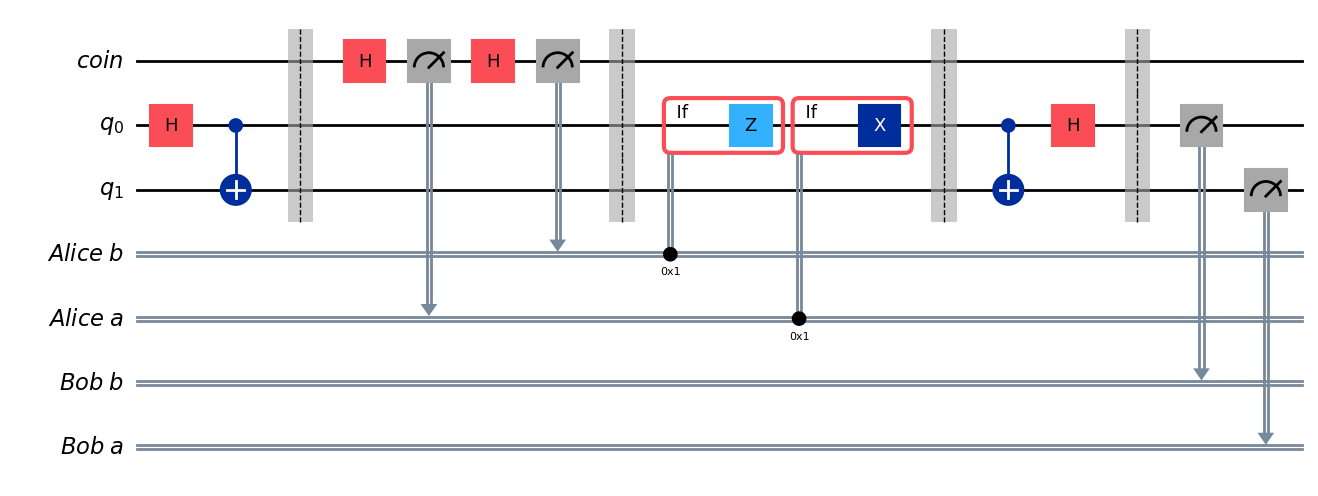

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import UnitaryGate, QFTGate
from qiskit.quantum_info import Statevector
import numpy as np

coin = QuantumRegister(1, 'coin')
alice_a = ClassicalRegister(1, 'Alice a')
alice_b = ClassicalRegister(1, 'Alice b')
bob_a = ClassicalRegister(1, 'Bob a')
bob_b = ClassicalRegister(1, 'Bob b')
ebit = QuantumRegister(2, 'q')

qc = QuantumCircuit(coin, ebit, alice_b, alice_a, bob_b, bob_a)

# create a Bell pair between Alice and Bob
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# Use coin to generate Alice random bits
qc.h(coin)
qc.measure(coin, alice_a)
qc.h(coin)
qc.measure(coin, alice_b)
qc.barrier()

with qc.if_test((alice_b, 1), label='Z'):
    qc.z(1)
with qc.if_test((alice_a, 1), label='X'):
    qc.x(1)
qc.barrier()

qc.cx(1, 2)
qc.h(1)
qc.barrier()

qc.measure(1, bob_b)
qc.measure(2, bob_a)

qc.draw('mpl', style='iqp', cregbundle=False)

{'0 1 0 1': 237, '0 0 0 0': 254, '1 1 1 1': 253, '1 0 1 0': 280}


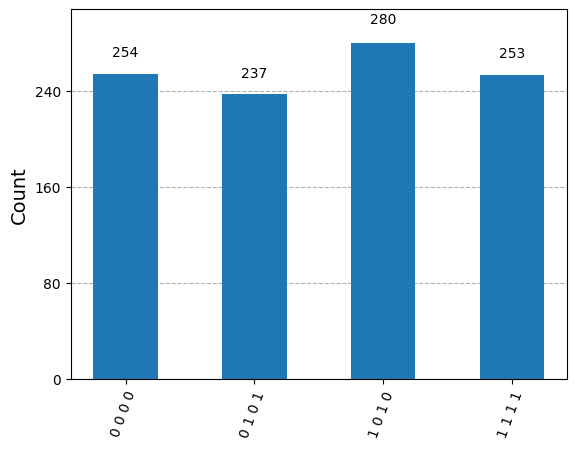

In [2]:
from qiskit_aer import AerSimulator
from qiskit.transpiler import PassManager
from qiskit.visualization import plot_histogram
from qiskit.compiler import transpile  

aer_sim = AerSimulator()

result = aer_sim.run(qc).result()

counts = result.get_counts()

print(counts)
plot_histogram(counts)